In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('data/organic_carbon.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ph              3276 non-null   float64
 1   Hardness        3276 non-null   float64
 2   Solids          3276 non-null   float64
 3   Conductivity    3276 non-null   float64
 4   Turbidity       3276 non-null   float64
 5   Organic_carbon  3276 non-null   float64
dtypes: float64(6)
memory usage: 153.7 KB


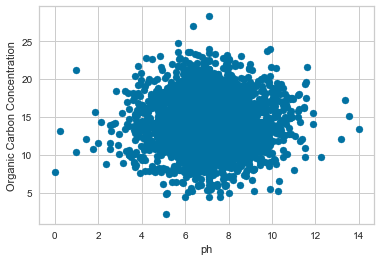

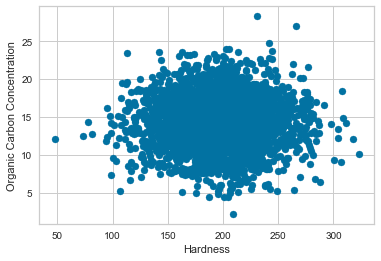

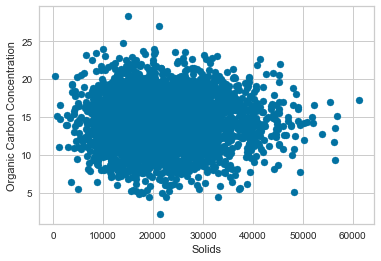

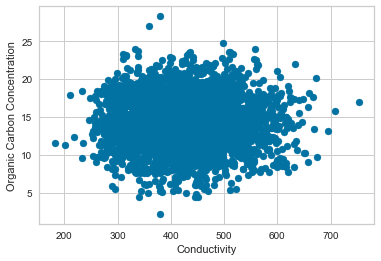

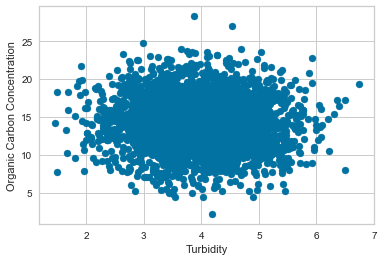

In [12]:
import matplotlib.pyplot as plt
for feature in range(len(df.columns)-1):
    plt.scatter(df[df.columns[feature]], df["Organic_carbon"])
    plt.xlabel(df.columns[feature])
    plt.ylabel("Organic Carbon Concentration")
    plt.show()

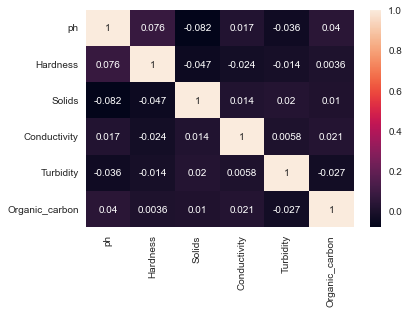

In [13]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()

In [17]:
from pycaret.regression import *
regression = setup(df, target='Organic_carbon', fold=5)
best_model = compare_models()
regression_results = pull()
print(regression_results)

,Description,Value
0,Session id,4756
1,Target,Organic_carbon
2,Target type,Regression
3,Original data shape,"(3276, 6)"
4,Transformed data shape,"(3276, 6)"
5,Transformed train set shape,"(2293, 6)"
6,Transformed test set shape,"(983, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,2.6230,10.8102,3.2872,-0.0006,0.2321,0.2098,1.0720
dummy,Dummy Regressor,2.6230,10.8102,3.2872,-0.0006,0.2321,0.2098,0.5980
ridge,Ridge Regression,2.6219,10.8230,3.2891,-0.0016,0.2322,0.2097,1.0180
lar,Least Angle Regression,2.6219,10.8230,3.2891,-0.0016,0.2322,0.2097,1.0780
lr,Linear Regression,2.6219,10.8230,3.2891,-0.0016,0.2322,0.2097,1.2380
br,Bayesian Ridge,2.6244,10.8229,3.2892,-0.0017,0.2322,0.2099,1.1540
lasso,Lasso Regression,2.6245,10.8267,3.2897,-0.0021,0.2322,0.2099,0.9860
en,Elastic Net,2.6245,10.8295,3.2902,-0.0023,0.2323,0.2099,1.0620
omp,Orthogonal Matching Pursuit,2.6262,10.8346,3.2909,-0.0027,0.2322,0.2100,1.3800
ada,AdaBoost Regressor,2.6346,10.8551,3.2939,-0.0046,0.2328,0.2113,0.9460


                                    Model     MAE      MSE    RMSE      R2  \
llar         Lasso Least Angle Regression  2.6230  10.8102  3.2872 -0.0006   
dummy                     Dummy Regressor  2.6230  10.8102  3.2872 -0.0006   
ridge                    Ridge Regression  2.6219  10.8230  3.2891 -0.0016   
lar                Least Angle Regression  2.6219  10.8230  3.2891 -0.0016   
lr                      Linear Regression  2.6219  10.8230  3.2891 -0.0016   
br                         Bayesian Ridge  2.6244  10.8229  3.2892 -0.0017   
lasso                    Lasso Regression  2.6245  10.8267  3.2897 -0.0021   
en                            Elastic Net  2.6245  10.8295  3.2902 -0.0023   
omp           Orthogonal Matching Pursuit  2.6262  10.8346  3.2909 -0.0027   
ada                    AdaBoost Regressor  2.6346  10.8551  3.2939 -0.0046   
gbr           Gradient Boosting Regressor  2.6663  11.1698  3.3410 -0.0334   
rf                Random Forest Regressor  2.7062  11.5545  3.39

In [18]:
import pickle 
pickle.dump(best_model, open("Models/Organic_Carbon_Regressor.pkl", "wb"))

In [19]:
final_best = finalize_model(best_model)
save_model(final_best, 'Orgnaic_Carbon_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Lenovo\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['ph', 'Hardness', 'Solids',
                                              'Conductivity', 'Turbidity'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator', LassoLars(random_state=4756))]),
 'Orgnaic_Carbon_pipeline.pkl')